
# Navigation - DQN

---


### 1. Import the Necessary Packages

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`

- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`


```
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")
```

### 2. Instantiate the Environment and the Agent

Initialize the environment in the code cell below.

In [2]:
import platform
os = platform.system()
if os == 'Windows':
    file_name = 'Banana_Windows_x86_64/Banana.exe'
elif os == 'Linux':
    file_name = '../Banana_Linux_NoVis/Banana.x86_64'

env = UnityEnvironment(file_name= file_name)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)



Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [4]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
score = 0 

while True:
    action = np.random.randint(action_size)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0] 
    reward = env_info.rewards[0]
    done = env_info.local_done[0]   
    score += reward
    state = next_state
    if done:
        break 
        
print("Score: {}".format(score))

Score: 0.0


### 3. Train the Agent with DQN



Episode 1	Average Score: -1.00
Episode 2	Average Score: 0.00
Episode 3	Average Score: -0.33
Episode 4	Average Score: -0.50
Episode 5	Average Score: -0.20
Episode 6	Average Score: -0.33
Episode 7	Average Score: -0.14
Episode 8	Average Score: -0.12
Episode 9	Average Score: -0.11
Episode 10	Average Score: 0.00
Episode 11	Average Score: 0.00
Episode 12	Average Score: 0.00
Episode 13	Average Score: -0.08
Episode 14	Average Score: -0.07
Episode 15	Average Score: -0.07
Episode 16	Average Score: 0.00
Episode 17	Average Score: 0.06
Episode 18	Average Score: 0.06
Episode 19	Average Score: 0.00
Episode 20	Average Score: -0.05
Episode 21	Average Score: -0.10
Episode 22	Average Score: -0.09
Episode 23	Average Score: -0.04
Episode 24	Average Score: -0.04
Episode 25	Average Score: 0.04
Episode 26	Average Score: 0.12
Episode 27	Average Score: 0.07
Episode 28	Average Score: 0.11
Episode 29	Average Score: 0.10
Episode 30	Average Score: 0.07
Episode 31	Average Score: 0.10
Episode 32	Average Score: 0.12
E

Episode 260	Average Score: 5.34
Episode 261	Average Score: 5.33
Episode 262	Average Score: 5.35
Episode 263	Average Score: 5.33
Episode 264	Average Score: 5.40
Episode 265	Average Score: 5.50
Episode 266	Average Score: 5.56
Episode 267	Average Score: 5.62
Episode 268	Average Score: 5.60
Episode 269	Average Score: 5.52
Episode 270	Average Score: 5.50
Episode 271	Average Score: 5.48
Episode 272	Average Score: 5.55
Episode 273	Average Score: 5.55
Episode 274	Average Score: 5.52
Episode 275	Average Score: 5.59
Episode 276	Average Score: 5.59
Episode 277	Average Score: 5.61
Episode 278	Average Score: 5.66
Episode 279	Average Score: 5.77
Episode 280	Average Score: 5.74
Episode 281	Average Score: 5.75
Episode 282	Average Score: 5.78
Episode 283	Average Score: 5.77
Episode 284	Average Score: 5.72
Episode 285	Average Score: 5.71
Episode 286	Average Score: 5.78
Episode 287	Average Score: 5.81
Episode 288	Average Score: 5.84
Episode 289	Average Score: 5.85
Episode 290	Average Score: 5.89
Episode 

Episode 513	Average Score: 12.48
Episode 514	Average Score: 12.46
Episode 515	Average Score: 12.45
Episode 516	Average Score: 12.45
Episode 517	Average Score: 12.56
Episode 518	Average Score: 12.68
Episode 519	Average Score: 12.63
Episode 520	Average Score: 12.63
Episode 521	Average Score: 12.62
Episode 522	Average Score: 12.59
Episode 523	Average Score: 12.56
Episode 524	Average Score: 12.63
Episode 525	Average Score: 12.71
Episode 526	Average Score: 12.75
Episode 527	Average Score: 12.73
Episode 528	Average Score: 12.68
Episode 529	Average Score: 12.81
Episode 530	Average Score: 12.79
Episode 531	Average Score: 12.73
Episode 532	Average Score: 12.78
Episode 533	Average Score: 12.82
Episode 534	Average Score: 12.85
Episode 535	Average Score: 12.81
Episode 536	Average Score: 12.79
Episode 537	Average Score: 12.72
Episode 538	Average Score: 12.74
Episode 539	Average Score: 12.74
Episode 540	Average Score: 12.78
Episode 541	Average Score: 12.71
Episode 542	Average Score: 12.70
Episode 54

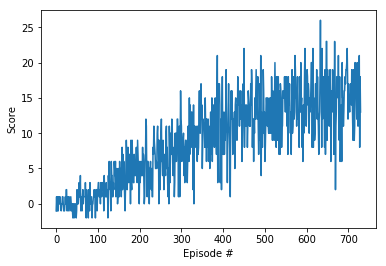

In [5]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        done = False
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0] 
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 1 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [ ]:


env.close()